In [13]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [288]:
data = pd.read_csv('diabetes.csv', header='infer')
data.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


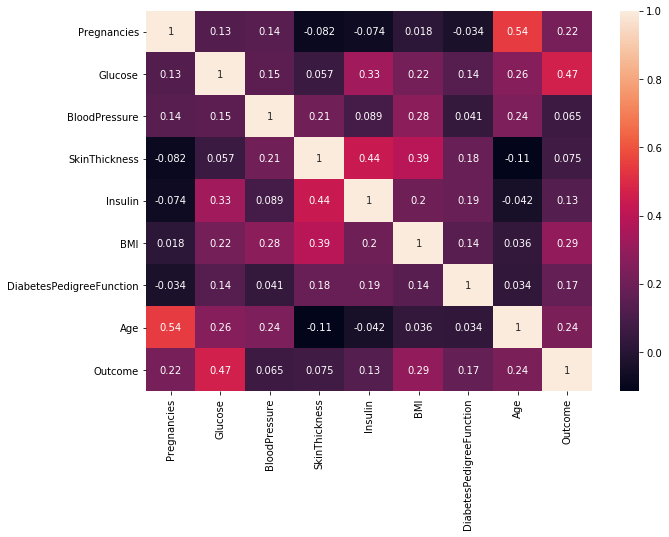

In [19]:
plt.figure(figsize=[10, 7])
corr_data = data.corr()
sns.heatmap(corr_data, annot=True)

In [21]:
corr_data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [46]:
corr_data.Age.sort_values()

SkinThickness              -0.113970
Insulin                    -0.042163
DiabetesPedigreeFunction    0.033561
BMI                         0.036242
Outcome                     0.238356
BloodPressure               0.239528
Glucose                     0.263514
Pregnancies                 0.544341
Age                         1.000000
Name: Age, dtype: float64

In [48]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


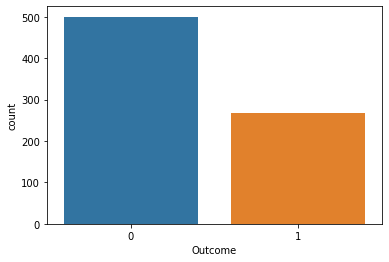

In [60]:
sns.countplot(data.Outcome)

#### We have a unbalanced class problem

In [133]:
def getmean(a):
    global yes, no
    no = round(data[data.Outcome==0][a].median())
    yes = round(data[data.Outcome==1][a].median())
    print(f'Yes = {yes}\nNo = {no}')

In [116]:
a = 'Glucose'
getmean(a)

Yes = 140
No = 107


In [117]:
getmean('Pregnancies')

Yes = 4
No = 2


In [122]:
getmean('BMI')

Yes = 34
No = 30


In [126]:
getmean('Age')

Yes = 36
No = 27


In [127]:
getmean('BloodPressure')

Yes = 74
No = 70


In [128]:
getmean('SkinThickness')

Yes = 27
No = 21


In [134]:
getmean('Insulin')

Yes = 0
No = 39


#### All the varaibles are more for '1' class than '0' class but for those who have diabetes have 0 insuline where as for those who dont have diabetes have 39 insuline

In [163]:
def getdistplot(a):
    sns.distplot(data[data.Outcome==0][a])
    sns.distplot(data[data.Outcome==1][a])
#     sns.distplot(data[a])
    plt.legend(['0', '1', a])

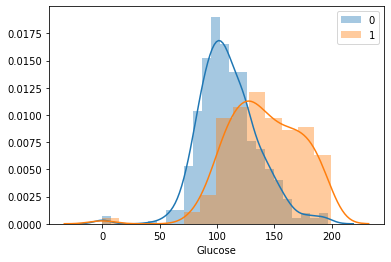

In [164]:
a = 'Glucose'
getdistplot(a)

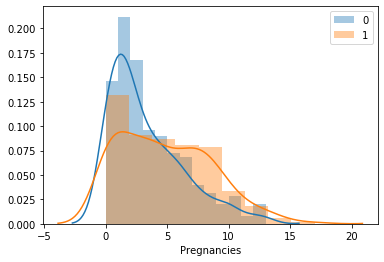

In [165]:
getdistplot('Pregnancies')

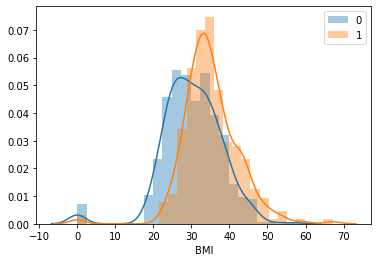

In [166]:
getdistplot('BMI')

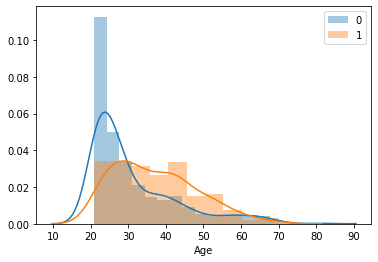

In [167]:
getdistplot('Age')

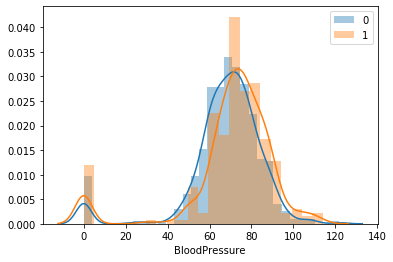

In [168]:
getdistplot('BloodPressure')

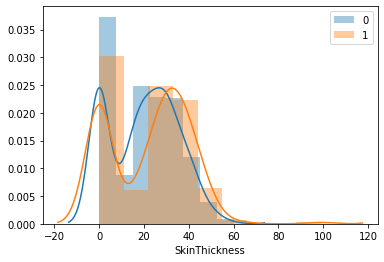

In [169]:
getdistplot('SkinThickness')

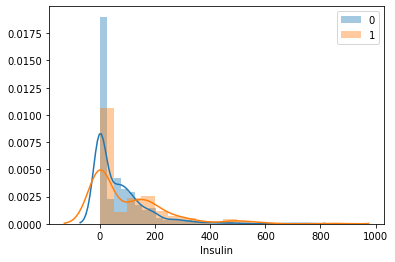

In [170]:
getdistplot('Insulin')

<BarContainer object of 768 artists>

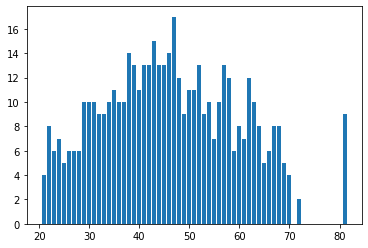

In [182]:
plt.bar(data.Age, data.Pregnancies)

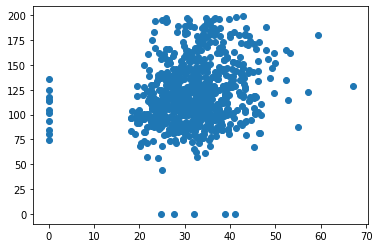

In [201]:
plt.scatter(data.BMI, data.Glucose)

In [205]:
data.std()

Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64

In [207]:
def outliers(x):
    return (x-x.mean())/x.std()

In [255]:
data1 = data.drop('Outcome', axis=1).apply(outliers)

In [256]:
data1['Outcome'] = data.Outcome

In [257]:
data = data1

In [274]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [275]:
x = data.drop('Outcome', axis=1)
y = data.Outcome

In [276]:
trainx, testx, trainy, testy = train_test_split(x, y, random_state=43)

In [279]:
# SpectralClustering()
KMeans()

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=8, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [280]:
# clust = SpectralClustering()
clust = KMeans(n_clusters=2)

In [281]:
clust.fit(trainx, trainy)    

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [264]:
# dist = clust.affinity_matrix_

In [265]:
# from scipy.cluster.hierarchy import dendrogram
# from scipy.cluster.hierarchy import linkage

In [266]:
# mat = linkage(dist, 'ward')

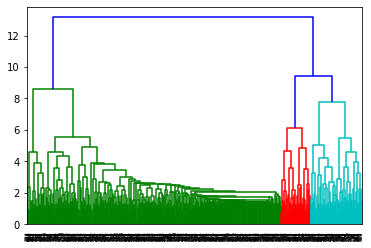

In [267]:
# a = dendrogram(mat)

In [289]:
clust =KMeans(n_clusters=2)

In [290]:
clust.fit(data.drop('Outcome', axis=1), data.Outcome)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [291]:
data['clust'] = clust.labels_

In [293]:
from sklearn.metrics import f1_score

In [294]:
f1_score(data.Outcome, clust.labels_)

0.397228637413395